### Import Statment

In [ ]:
%pip install torch

import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F

: 

### Data Preparation

Here, the actual function we are trying to approximate is:

$y = x^3+20$

This equation determines how $y$ depends on $x$.

However, we pretend that we don’t know this equation and try to train a neural network to learn it.

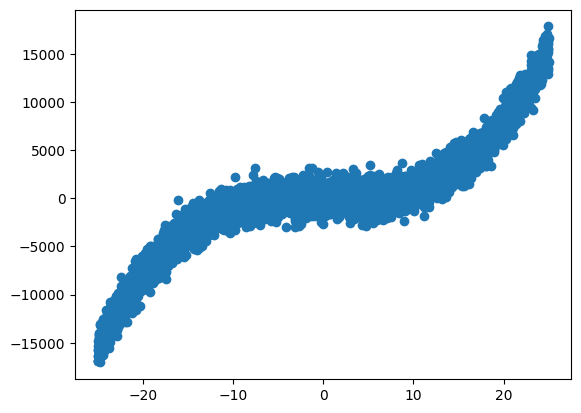

Length of x: (5000,)
Length of y: (5000,)
Type of x:  <class 'numpy.ndarray'>
Type of y:  <class 'numpy.ndarray'>
min(x), max(x):  -25.0 24.99000000000781
min(y), max(y):  -17041.04189231788 17841.122997501298


In [12]:
#Step 1: Training data generating

def dataset(show=True):
    # Generate an array of x values from -25 to 25 with a step of 0.01
    x = np.arange(-25, 25, 0.01)

    # Generate the corresponding y values based on a mathematical function
    # In this case, y is computed as x^3 + 20 + random noise
    y = x**3 + 20 + np.random.randn(len(x)) * 1000


    # If 'show' is True, plot the dataset as a scatter plot
    if show:
        plt.scatter(x, y)
        plt.show()

    # Return the generated x and y values as a tuple
    return x, y

# Call the 'dataset' function and assign the returned values to x and y
x, y = dataset()

print("Length of x:", x.shape)
print("Length of y:",y.shape)
print('Type of x: ',type(x))
print('Type of y: ',type(y))
print('min(x), max(x): ',min(x), max(x))
print('min(y), max(y): ',min(y),max(y))

#### Normalizing the data

In [13]:
# Normalize the 'x' values by dividing each element by the maximum value in 'x'
x = x / max(x)

# Normalize the 'y' values by dividing each element by the maximum value in 'y'
y = y / max(y)

In [14]:
print(min(x), max(x))
print(min(y),max(y))

-1.000400160063713 1.0
-0.9551552273197449 1.0


#### Converting data to tensor format so that we use pytorch

Unsqueeze(1) effectively changes the shape of 'x_torch' & 'y_torch' from a 1D tensor to a 2D tensor with a single column, which is often required when working with neural networks that expect input data in a specific format.






In [15]:
# Convert the 'x' array to a PyTorch tensor with float data type and add a new dimension (unsqueeze) along axis 1
x_torch = torch.tensor(x, dtype=torch.float).unsqueeze(1)

# Convert the 'y' array to a PyTorch tensor with float data type and add a new dimension (unsqueeze) along axis 1
y_torch = torch.tensor(y, dtype=torch.float).unsqueeze(1)


In [16]:
print('Type of x: ',type(x_torch))
print('Type of y: ',type(y_torch))
print(x_torch.shape)
print(y_torch.shape)

Type of x:  <class 'torch.Tensor'>
Type of y:  <class 'torch.Tensor'>
torch.Size([5000, 1])
torch.Size([5000, 1])


### Single perceptron

We build a simple linear regression model in PyTorch, including setting hyperparameters, a loss function, and an optimizer for training, and train the model over a specified number of epochs, records the loss history, and finally plots the MSE loss and the predicted line against the input data.

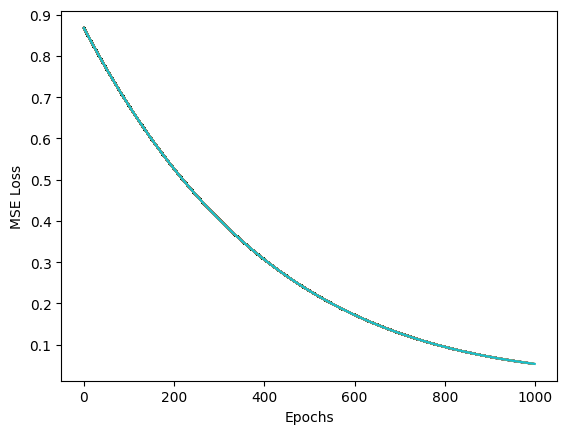

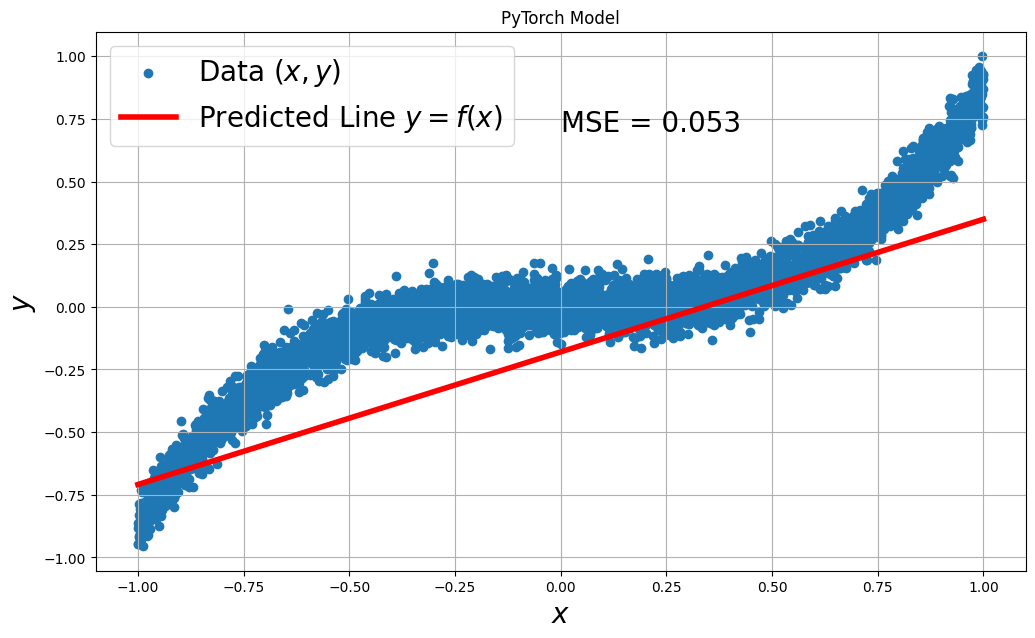

In [17]:
## Step 1: Define the model architecture
# Create a simple linear regression model using a single linear layer (in_features=1, out_features=1)
model = torch.nn.Sequential(torch.nn.Linear(in_features=1, out_features=1))

## Step 2: Set Hyperparameter
# Define the learning rate for the optimizer
learning_rate = 1e-3

## Step 3: Define loss function
# Define the mean squared error (MSE) loss function for regression tasks
loss_func = torch.nn.MSELoss(reduction='mean')

## Step 4: Define the optimizer
# Use the Adam optimizer to update the model's parameters with the specified learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Step 5: Define the number of training epochs

num_ep = 1000

## Step 6: Declare an empty list for losses. This will keep track of all losses during training
loss_history = []

## Step 7: Training loop
# Loop over the specified number of training epochs
for ep in range(num_ep):
    # Forward pass: Predict the output (y_pred) using the current model
    y_pred = model(x_torch)

    # Calculate the MSE loss between predicted values and actual values
    loss = loss_func(y_pred, y_torch)

    # Append the current loss to the loss history list
    loss_history.append(loss.item())

    # Zero the gradients to prevent accumulation
    optimizer.zero_grad()

    # Backpropagate the gradients (compute gradients with respect to model parameters)
    loss.backward()

    # Update the model's parameters using the optimizer
    optimizer.step()

    # Plot the loss history over training epochs (optional)
    plt.plot(loss_history)

## Step 8: Plot the loss history
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

## Step 9: Compute the final MSE and make prediction
mse = loss_history[-1]

# Make predictions on the input data using the trained model
y_hat = model(x_torch).detach().numpy()

## Step 10: Visualize the original data, predicted line, and MSE value
plt.figure(figsize=(12, 7))
plt.title('PyTorch Model')
plt.scatter(x, y, label='Data $(x, y)$')
plt.plot(x, y_hat, color='red', label='Predicted Line $y = f(x)$', linewidth=4.0)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0, 0.70, 'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()


### Multi layer Perceptron (No activation)

We build a multi-layer neural network without activation functions, train it to perform regression using the mean squared error (MSE) loss, and visualizes the training progress and the model's predictions. Activation functions are omitted in this model, resulting in a linear regression model. This shows the importance of acitivation functions in introducing non-linearity into the model.






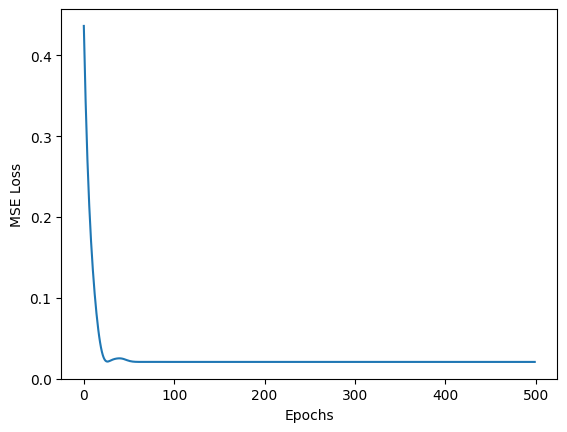

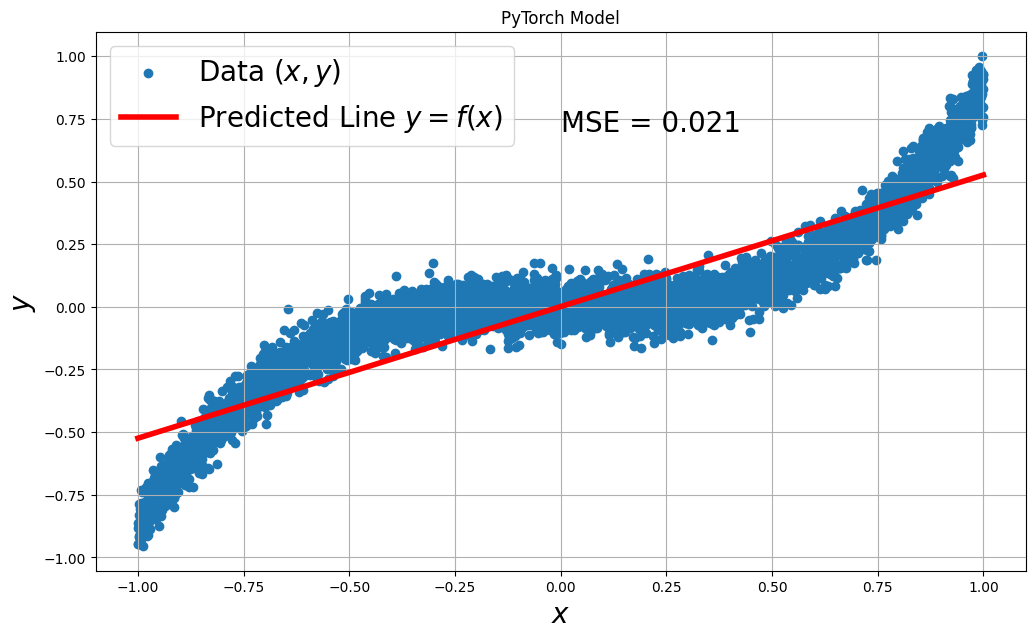

In [18]:
# Define a custom neural network class named 'Net_no_activation' without activation functions
class Net_no_activation(nn.Module):
    def __init__(self, hidden_size):
        super(Net_no_activation, self).__init__()
        self.hidden_size = hidden_size
        self.layer1 = nn.Linear(1, self.hidden_size)  # First linear layer
        self.layer2 = nn.Linear(self.hidden_size, 1)  # Second linear layer

    def forward(self, x):
        x = self.layer1(x)  # Forward pass through the first linear layer
        # x = F.relu(x)      # Commented out activation function (ReLU)
        x = self.layer2(x)  # Forward pass through the second linear layer
        return x

# Create an instance of the 'Net_no_activation' neural network with a hidden size of 100
multi_layer_model_no_activation = Net_no_activation(hidden_size=100)

# Set the learning rate for the optimizer
learning_rate = 1e-3

# Define the mean squared error (MSE) loss function for regression tasks
loss_func = torch.nn.MSELoss(reduction='mean')

# Initialize an Adam optimizer for the model's parameters
multi_layer_optimizer_no_activation = torch.optim.Adam(multi_layer_model_no_activation.parameters(), lr=learning_rate)

# Specify the number of training epochs
num_ep = 500

# Create an empty list to store loss values during training
loss_history = []

# Training loop
for ep in range(num_ep):
    # Forward pass: Predict the output (y_pred) using the current model
    y_pred = multi_layer_model_no_activation(x_torch)

    # Calculate the MSE loss between predicted values and actual values
    loss = loss_func(y_pred, y_torch)

    # Append the current loss to the loss history list
    loss_history.append(loss.item())

    # Zero the gradients to prevent accumulation
    multi_layer_optimizer_no_activation.zero_grad()

    # Backpropagate the gradients (compute gradients with respect to model parameters)
    loss.backward()

    # Update the model's parameters using the optimizer
    multi_layer_optimizer_no_activation.step()

# Plot the loss history over training epochs
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

# Retrieve the final MSE loss value
mse = loss_history[-1]

# Make predictions on the input data using the trained model
y_hat = multi_layer_model_no_activation(x_torch).detach().numpy()

# Create a plot to visualize the original data, predicted line, and MSE value
plt.figure(figsize=(12, 7))
plt.title('PyTorch Model')
plt.scatter(x, y, label='Data $(x, y)$')
plt.plot(x, y_hat, color='red', label='Predicted Line $y = f(x)$', linewidth=4.0)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0, 0.70, 'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

### Multi-Perceptron with activation

We introduce non-linearity into the model using Rectified Linear Unit(ReLU) activation function between the two linear layers, allowing it to capture nonlinear relationships in the data.






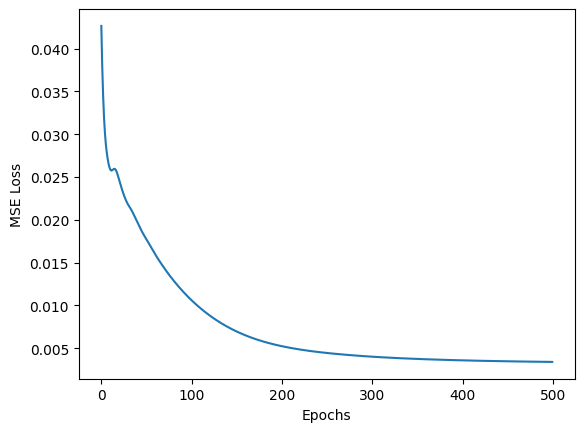

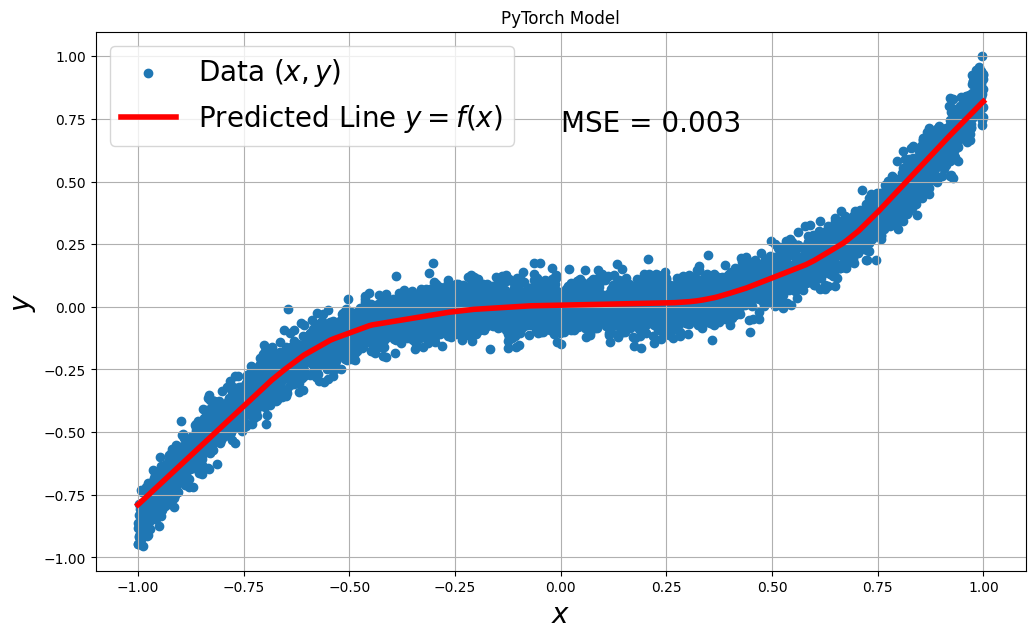

In [19]:
# Define a custom neural network class named 'Net' with activation functions
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        self.layer1 = nn.Linear(1, self.hidden_size)  # First linear layer
        self.layer2 = nn.Linear(self.hidden_size, 1)  # Second linear layer

    def forward(self, x):
        x = self.layer1(x)        # Forward pass through the first linear layer
        x = F.relu(x)             # Apply the ReLU activation function
        x = self.layer2(x)        # Forward pass through the second linear layer
        return x

# Create an instance of the 'Net' neural network with a hidden size of 100
multi_layer_model = Net(hidden_size=100)

# Set the learning rate for the optimizer
learning_rate = 1e-3

# Define the mean squared error (MSE) loss function for regression tasks
loss_func = torch.nn.MSELoss(reduction='mean')

# Initialize an Adam optimizer for the model's parameters
multi_layer_optimizer = torch.optim.Adam(multi_layer_model.parameters(), lr=learning_rate)

# Specify the number of training epochs
num_ep = 500

# Create an empty list to store loss values during training
loss_history = []

# Training loop
for ep in range(num_ep):
    # Forward pass: Predict the output (y_pred) using the current model
    y_pred = multi_layer_model(x_torch)

    # Calculate the MSE loss between predicted values and actual values
    loss = loss_func(y_pred, y_torch)

    # Append the current loss to the loss history list
    loss_history.append(loss.item())

    # Zero the gradients to prevent accumulation
    multi_layer_optimizer.zero_grad()

    # Backpropagate the gradients (compute gradients with respect to model parameters)
    loss.backward()

    # Update the model's parameters using the optimizer
    multi_layer_optimizer.step()

# Plot the loss history over training epochs
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

# Retrieve the final MSE loss value
mse = loss_history[-1]

# Make predictions on the input data using the trained model
y_hat = multi_layer_model(x_torch).detach().numpy()

# Create a plot to visualize the original data, predicted line, and MSE value
plt.figure(figsize=(12, 7))
plt.title('PyTorch Model')
plt.scatter(x, y, label='Data $(x, y)$')
plt.plot(x, y_hat, color='red', label='Predicted Line $y = f(x)$', linewidth=4.0)
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0, 0.70, 'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()
